# Notebook für die Datenanalyse des ... Experiments

In [7]:
# imports
import numpy as np
import pandas as pd
import psignifit as ps 
import matplotlib.pyplot as plt
import glob

participant_id = "..." # Name of folder for participant

path = "Data/" + participant_id + "/*.csv" # Path to data for participant

#data = pd.read_csv(path) # Read experiment files for participant

# data sollte in Form np.array([ [stimulus_level, nCorrect, nTotal] ])

Die Daten sollten in Form eines Numpy-Arrays, ala:

`data = np.array([[stimulus_level, nCorrect, nTotal], ...])` (Beispiel unten)

wobei `stimulus_level` der prozentuale Unterschied in der Distanz der beiden Pfosten, `nCorrect` die Anzahl an korrekten Entscheidungen und `nTotal` die Anzahl an gezeigten Stimuli ist.

Darüber hinaus wird ein Dictionary benötigt (`options = dict()`). Dieses sollte folgende Komponenten haben:

`options['sigmoidName'] = 'norm'`, `options['expType'] = '2AFC'` (Beispiel unten)

wobei `sigmoidName` die Funktionsart festlegt (hier ist `norm` die cumulative Gaussian distribution function), und `expType` die Art des Experimentes aus 2AFC, 2IFC, YesNo, etc. festlegt. Die Resultate werden mit `results = ps.psignifit(data, options)` erstellt und mit `ps.psigniplot.plotPsych(results)` geplottet.

#### Beispielhafte Verwendung:

(array([], dtype=int64),)
Results.Fit:  [4.64484725e-03 4.68383735e-03 1.06763396e-07 5.00000000e-01
 1.15991375e-04]
Results.conf_Intervals:  [[[4.28293676e-03 4.34071476e-03 4.45598997e-03]
  [4.96425222e-03 4.90778489e-03 4.79392722e-03]]

 [[3.53217061e-03 3.71449988e-03 4.08401059e-03]
  [6.04090583e-03 5.78088514e-03 5.31350102e-03]]

 [[1.67813158e-04 3.35626316e-04 1.07400421e-03]
  [2.19408856e-02 1.81363503e-02 1.11785985e-02]]

 [[5.00000000e-01 5.00000000e-01 5.00000000e-01]
  [5.00000000e-01 5.00000000e-01 5.00000000e-01]]

 [[1.29542669e-03 2.59085338e-03 8.29073082e-03]
  [1.19572644e-01 1.01631428e-01 6.91191057e-02]]]


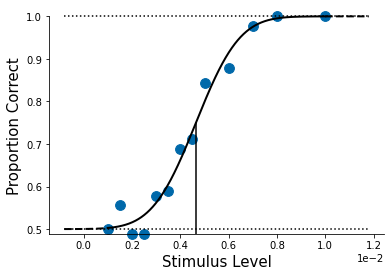

<AxesSubplot:xlabel='Stimulus Level', ylabel='Proportion Correct'>

In [12]:
data = np.array([[0.0010,   45.0000,   90.0000],
    [0.0015,   50.0000,   90.0000],
    [0.0020,   44.0000,   90.0000],
    [0.0025,   44.0000,   90.0000],
    [0.0030,   52.0000,   90.0000],
    [0.0035,   53.0000,   90.0000],
    [0.0040,   62.0000,   90.0000],
    [0.0045,   64.0000,   90.0000],
    [0.0050,   76.0000,   90.0000],
    [0.0060,   79.0000,   90.0000],
    [0.0070,   88.0000,   90.0000],
    [0.0080,   90.0000,   90.0000],
    [0.0100,   90.0000,   90.0000]])

options = dict()
options['sigmoidName'] = 'norm'
options['expType'] = '2AFC'


results = ps.psignifit(data, options) # Get results

print(f"Results.Fit: ", results['Fit'])
print(f"Results.conf_Intervals: ", results['conf_Intervals'])

ps.psigniplot.plotPsych(results) # Plot results